## Observations and Insights 

###ANALYSIS

#1. The tumor volume for Capomulin and Ramicane are much closer to the average for the data set than Infubinol or Ceftamin.

#2. The tumor volume decreased overtime for the drug regimen Capomulin.

#3. There is a strong positive correlation between average tumor volume and average mouse weight.

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# Set variables for data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [30]:
# Count total number of Mice

mouse_count = data["Mouse ID"].count()
#Print out result

print(f"The number of unique mice in the study was: {mouse_count}")


The number of unique mice in the study was: 1893


In [31]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated= data[data.duplicated(subset= ['Mouse ID','Timepoint'])]

#Create the dataframe

duplicated= pd.DataFrame(duplicated["Mouse ID"])
#Show the duplicate

duplicated

,Mouse ID
909,g989
911,g989
913,g989
915,g989
917,g989


In [32]:
# Optional: Get all the data for the duplicate mouse ID. 

all_duplicated = data[data.duplicated(subset= ['Mouse ID','Timepoint'])]
#Display result

all_duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data = data.drop_duplicates(subset= ['Mouse ID','Timepoint'])

In [34]:
# Checking the number of mice in the clean DataFrame.
mouse_count = data["Mouse ID"].count()
#Print out the number of mice once duplicates have been removed
print(f"When the duplicates are removed the mouse count is: {mouse_count}")

When the duplicates are removed the mouse count is: 1888


## Summary Statistics

In [35]:
#Create Dataframe for Drug Regimen and Tumorvolume and groupby the Drug Regimen

drug_regimen = data[['Drug Regimen','Tumor Volume (mm3)']]
drug_df = drug_regimen.groupby(["Drug Regimen"])

#Calculate mean, median, variance, standard deviation, and SEM

drug_mean = round(drug_df.mean(),2)
drug_median = round(drug_df.median(),2)
drug_var =round(drug_df.var(),2)
drug_std = round(drug_df.std(),2)
drug_sem = round(drug_df.sem(),2)

# Assemble the resulting series into a single summary dataframe.

mean_median = pd.merge(drug_mean,drug_median,on="Drug Regimen")
var_std =pd.merge(drug_var,drug_std,on="Drug Regimen")
mm_vs = pd.merge(mean_median,var_std,on="Drug Regimen")
drug_summary = pd.merge(mm_vs, drug_sem,on="Drug Regimen")
drug_summary = drug_summary.rename(columns={"Tumor Volume (mm3)_x_x": "Mean",
                                  "Tumor Volume (mm3)_y_x": "Median",
                                  "Tumor Volume (mm3)_x_y": "Variance",
                                  "Tumor Volume (mm3)_y_y": "Standard Deviation",
                                  "Tumor Volume (mm3)": "SEM"})
#Display Result

drug_summary



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.39,50.91,43.14,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [36]:
#Create Summary table using .agg method

agg_summary = round(drug_df.agg(['mean','median','var','std','sem']),2)
#Display Result

agg_summary

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.39  50.91  43.14  6.57  0.53
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

Text(0, 0.5, 'Count')

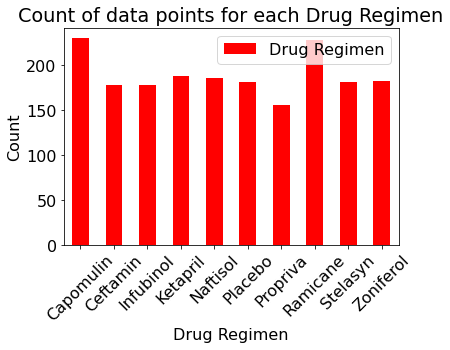

In [37]:
#Create a dataframe grouped by Drug Regimen
drug_group = data.groupby('Drug Regimen')

# Create a dataframe counting the number of data points for each Drug Regimen
drug_group_count = pd.DataFrame(drug_group['Drug Regimen'].count())


# Create a bar chart based off of the group series from before and label the title
count_chart = drug_group_count.plot(kind='bar', title="Count of data points for each Drug Regimen", color="red", rot= 45)

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Count")

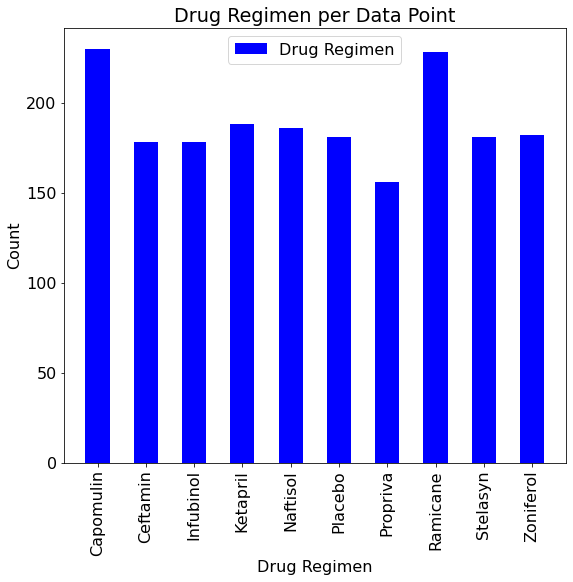

In [38]:
#Set x_axis and tick locations

x_axis = np.arange(len(drug_group_count))
tick_locations = [value for value in x_axis]

#Create a list indicating where to write x labels and set figure size to adjust for space
    
plt.figure(figsize=(9,8))
plt.bar(x_axis, drug_group_count["Drug Regimen"], color='blue', align="center", width = 0.5)
plt.xticks(tick_locations, list(drug_group_count.index), rotation="vertical")

# Set x and y limits

plt.xlim(-0.7, len(x_axis)-0.3)
plt.ylim(0, max(drug_group_count["Drug Regimen"])*1.05)

# Set a Title and labels

plt.title("Drug Regimen per Data Point")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
#Set column name and display bar chart

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")
plt.show()

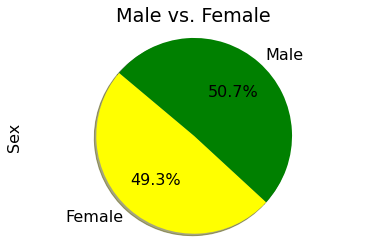

In [39]:
#Create data frame grouped on Sex

gender_group = data.groupby('Sex')

# Create a dataframe counting the number of data points for each gender

gender_group_count = pd.DataFrame(gender_group['Sex'].count())


#Create a pie chart

gender_group_count.plot(kind='pie', y='Sex', title="Male vs. Female",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["yellow","green"],legend =False)

# Make the axis equal to avoid plotting an egg shaped pie chart

plt.axis("equal")

#Display Pie Chart

plt.show()

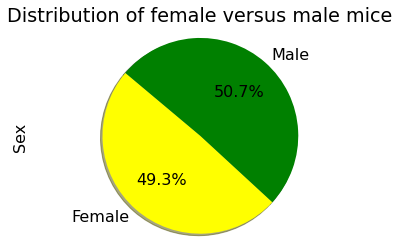

In [40]:
#Create a list of genders based on gender group count

genders = list(gender_group_count.index.values)

# The values of each section of the pie chart

gender_counts = gender_group_count['Sex']

# The colors of each section of the pie chart

colors = ["yellow", "green"]

# Creates the pie chart based upon the values above and automatically finds the percentages of each part of the pie chart

plt.pie(gender_counts, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.rcParams['font.size'] = 16
plt.title("Distribution of female versus male mice")
plt.ylabel("Sex")
plt.axis("equal")

#Display the Pie Chart

plt.show()


## Quartiles, Outliers and Boxplots

In [41]:
#Create a list for the specified drugs

drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint = data[["Mouse ID", "Timepoint"]].groupby(["Mouse ID"])
max_timepoint = max_timepoint.max("Timepoint")
max_timepoint


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

max_timepoint = pd.merge(max_timepoint,data, on = ["Timepoint", 'Mouse ID'], how = 'left')

#Display the results

max_timepoint.head()

,Timepoint,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,45,a203,Infubinol,Female,20,23,67.973419,2
1,45,a251,Infubinol,Female,21,25,65.525743,1
2,45,a262,Placebo,Female,17,29,70.717621,4
3,45,a275,Ceftamin,Female,20,28,62.999356,3
4,30,a366,Stelasyn,Female,16,29,63.440686,1


In [42]:

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

tumor_volume = data[["Mouse ID", "Tumor Volume (mm3)"]]    
quartiles = data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {round(lowerq,4)}")
print(f"The upper quartile of Tumor Volume (mm3) is: {round(upperq,4)}")
print(f"The interquartile range of Tumor Volume (mm3) is: {round(iqr,4)}")
print(f"The the median of Tumor Volume (mm3) is: {round(quartiles[0.5],4)} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,4)} could be outliers.")
print(f"Values above {round(upper_bound,4)} could be outliers.")
    
    

The lower quartile of Tumor Volume (mm3) is: 45.0
The upper quartile of Tumor Volume (mm3) is: 56.3241
The interquartile range of Tumor Volume (mm3) is: 11.3241
The the median of Tumor Volume (mm3) is: 48.9514 
Values below 28.0139 could be outliers.
Values above 73.3102 could be outliers.


In [43]:
# Set Drug List

drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
for drug in drug_list:
    tumor_vol_by_drug = max_timepoint.loc[max_timepoint['Drug Regimen']== drug,'Tumor Volume (mm3)']
    
# Add subset

    tumor_vol.append(tumor_vol_by_drug)

# Determine outliers using upper and lower bounds

    quartiles = tumor_vol_by_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    outliers = tumor_vol_by_drug.loc[(tumor_vol_by_drug < lower_bound) | (tumor_vol_by_drug > upper_bound)]
    iqr = upperq-lowerq
    print(f'For {drug}, Interquartile Range (IQR) is {round(iqr,4)}.')
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'For {drug}, values below {round(lower_bound,4)} could be outliers.')
    print(f'For {drug}, values above {round(upper_bound,4)} could be outliers.\n')

For Capomulin, Interquartile Range (IQR) is 7.7819.
For Capomulin, values below 20.7046 could be outliers.
For Capomulin, values above 51.832 could be outliers.

For Ramicane, Interquartile Range (IQR) is 9.0985.
For Ramicane, values below 17.9127 could be outliers.
For Ramicane, values above 54.3068 could be outliers.

For Infubinol, Interquartile Range (IQR) is 11.4771.
For Infubinol, values below 36.8329 could be outliers.
For Infubinol, values above 82.7414 could be outliers.

For Ceftamin, Interquartile Range (IQR) is 15.5778.
For Ceftamin, values below 25.3554 could be outliers.
For Ceftamin, values above 87.6665 could be outliers.



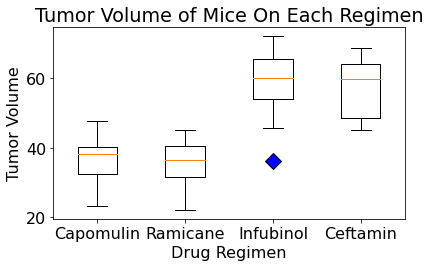

In [52]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

blue_diamond = dict(markerfacecolor='b', marker='D', markersize = 12)
plt.boxplot(tumor_vol,labels=drug_list,  flierprops= blue_diamond)

# Set title, labels, limits

plt.title('Tumor Volume of Mice On Each Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume')
plt.tight_layout()

#Display Box Plot

plt.show()

## Line and Scatter Plots

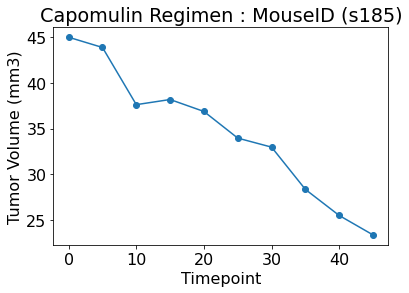

In [45]:
#Isolate a data frame on a single mouse for a single drug 
a_mouse = data[['Timepoint', 'Tumor Volume (mm3)']].loc[(data['Drug Regimen'] == 'Capomulin') & (data['Mouse ID']=='s185')]
a_mouse

#Plot the result
plt.plot(a_mouse['Timepoint'], a_mouse['Tumor Volume (mm3)'], marker='o')
plt.title("Capomulin Regimen : MouseID (s185)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")

#Display the Result
plt.show()

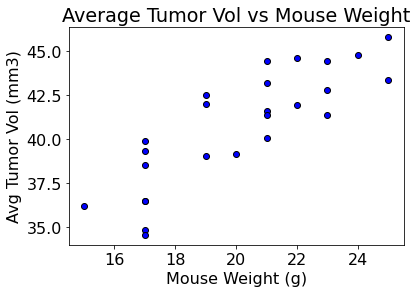

In [46]:
# Calculate vol_weight for Capomulin and show only the Mouse ID Weight and Tunor Volume and group by the Mouse ID and Weight

vol_weight = data[(data["Drug Regimen"] == "Capomulin")]
vol_weight = vol_weight[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
each_weight = vol_weight.groupby(["Mouse ID", "Weight (g)"])


#Calculate the average volume

avg_vol_df = each_weight["Tumor Volume (mm3)"].mean().to_frame()
avg_vol_df = avg_vol_df.reset_index()

#Show the data as a scatter plot

plt.scatter(avg_vol_df["Weight (g)"],
            avg_vol_df["Tumor Volume (mm3)"],
            marker = 'o',
            facecolors='blue',
            edgecolors='black')
#Set Title and labels

plt.title('Average Tumor Vol vs Mouse Weight')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg Tumor Vol (mm3)')

#Display the chart

plt.show()

## Correlation and Regression

The linear regression equation is y = 0.95x + 21.55


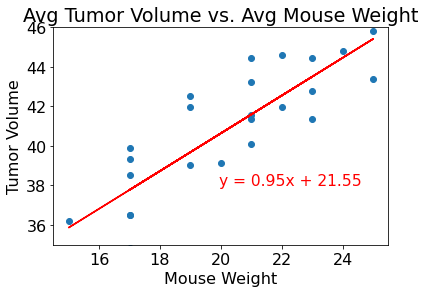

In [48]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = avg_vol_df['Weight (g)']
y_values = avg_vol_df['Tumor Volume (mm3)']

# Calculate the linear regression

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#Print the linear equation

print(f'The linear regression equation is {line_eq}')

# plot line with scatter

plt.scatter(x_values, y_values)

#Set the title and labels

plt.title('Avg Tumor Volume vs. Avg Mouse Weight')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.ylim(35,46)

# calculate regression values

reg_values = x_values * slope + intercept
plt.plot(x_values, reg_values, "r-")
plt.annotate(line_eq,(19.95,38),fontsize=15.5,color="red")

#Display the graph
plt.show()